I have always been a fan of Pokemon. It has been nearly 15 years, but I have not grown bored of it. Each new episode or movie continues to surprise me.

This kernel will contain some analysis that I have done. I opted to do this to perfect my data visualization and data analysis skills.

## CONTENTS:

### 1. Missing Values *(complete)*
* 1.1 Whether missing values are present or not
* 1.2 Visualize them
* 1.3 Learn how to impute them

### 2. Analyzing Datatypes *(complete)*
### 3. Memory Consumption *(complete)*
### 4. Data Exploration *(complete)*
### 5. Data Analysis *(planned)*
### 6. Feature Engineering *(planned)*

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

df_pokemon = pd.read_csv('../input/pokemon.csv')

print (df_pokemon.shape)

pokemon.csv

(801, 41)


# 1. Missing values

In this section we will see:
* 1.1 Whether missing values are present or not
* 1.2 Visualize them
* 1.3 Learn how to impute them

## 1.1 Check the presence of missing values

In [2]:
df_pokemon.isnull().values.any()

True

Missing values are present in the dataframe. Collect columns with missing values into a list:

In [3]:
cols_missing_val = df_pokemon.columns[df_pokemon.isnull().any()].tolist()
print(cols_missing_val)

['height_m', 'percentage_male', 'type2', 'weight_kg']


There are four columns with missing values.

Let us get the exact count of each of the missing columns:

In [4]:
for col in cols_missing_val:
    print("%s : %d" % (col, df_pokemon[col].isnull().sum()))

height_m : 20
percentage_male : 98
type2 : 384
weight_kg : 20


## 1.2 Visualizing missing values

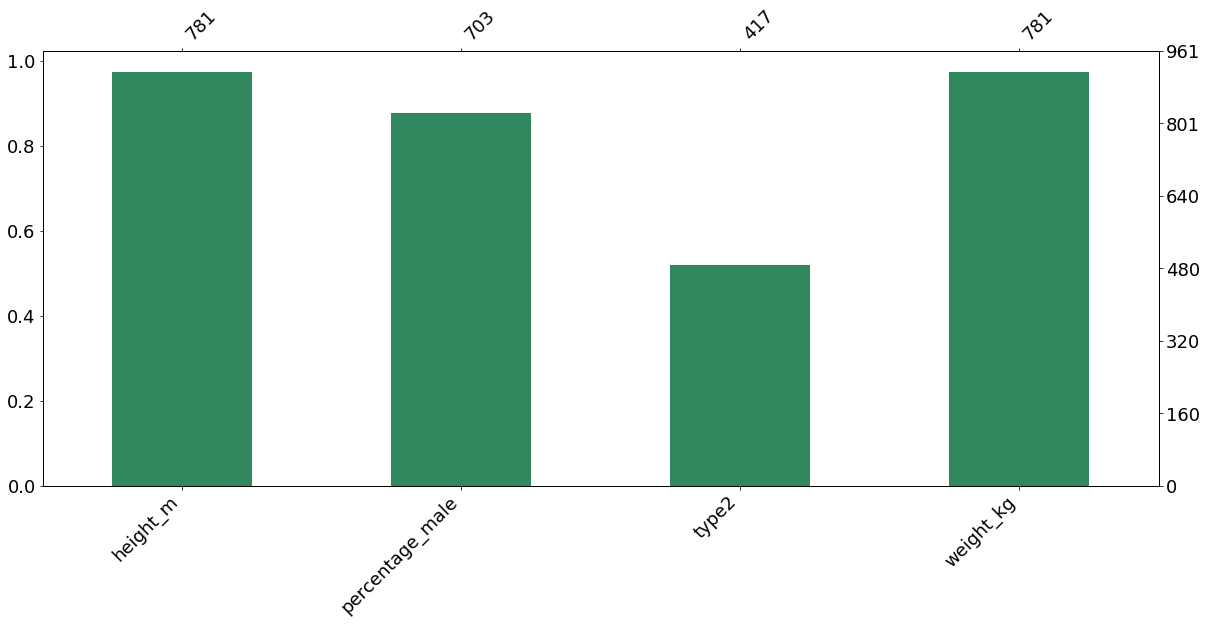

In [5]:
msno.bar(df_pokemon[cols_missing_val],figsize=(20,8),color="#32885e",fontsize=18,labels=True,)

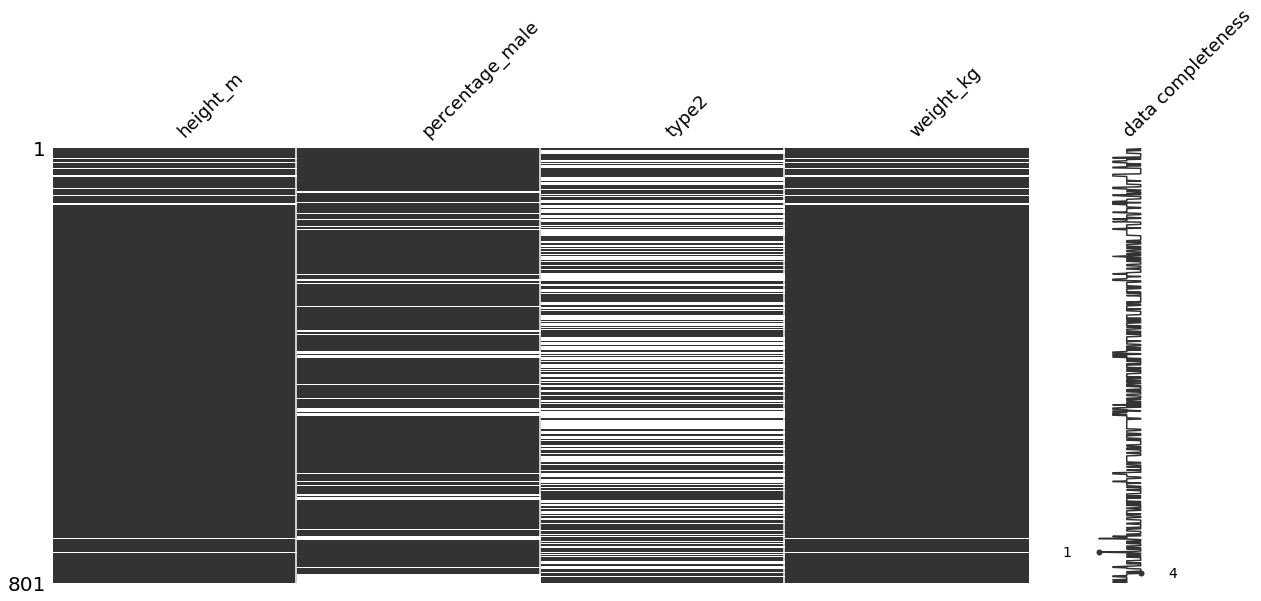

In [6]:
msno.matrix(df_pokemon[cols_missing_val],width_ratios=(10,1),\
            figsize=(20,8),color=(0.2,0.2,0.2),fontsize=18,sparkline=True,labels=True)

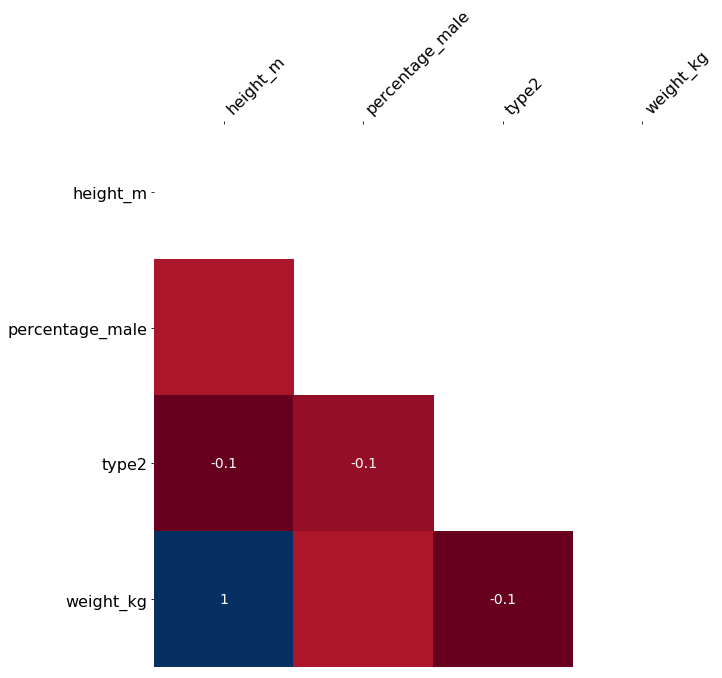

In [7]:
msno.heatmap(df_pokemon[cols_missing_val],figsize=(10,10))

## 1.3 Imputing Missing values

In order to impute missing values in each column, the other values must be seen as well.

The following snippet shows the number of unique values in each of the columns having missing values:

In [8]:
for col in cols_missing_val:
    print("%s : %d" % (col,df_pokemon[col].nunique()))

height_m : 51
percentage_male : 7
type2 : 18
weight_kg : 421


**percentage_male**

percentage_male: The percentage of the species that are male. Blank if the Pokemon is genderless.

Hence genderless pokemons can be assigned '-1'

In [9]:
df_pokemon['percentage_male'].fillna(np.int(-1), inplace=True)

**type2**

Let us look at the various string elements present

In [10]:
df_pokemon['type2'].unique()

array(['poison', nan, 'flying', 'dark', 'electric', 'ice', 'ground',
       'fairy', 'grass', 'fighting', 'psychic', 'steel', 'fire', 'rock',
       'water', 'dragon', 'ghost', 'bug', 'normal'], dtype=object)

We will assign missing values with some string not present in this list:

In [11]:
df_pokemon['type2'].fillna('HHH', inplace=True)

**height_m** and **weight_kg**

We will replace the missing values with 0.

In [12]:
df_pokemon['height_m'].fillna(np.int(0), inplace=True)
df_pokemon['weight_kg'].fillna(np.int(0), inplace=True)

Now let us check if there are missing values remaining

In [13]:
df_pokemon.isnull().values.any()

False

# Analyzing Datatypes

In this section we will see:
* Different datatypes present in the dataframe
* Visualize the same

In [14]:
print(df_pokemon.dtypes.unique())
print(df_pokemon.dtypes.nunique())

[dtype('O') dtype('float64') dtype('int64')]
3


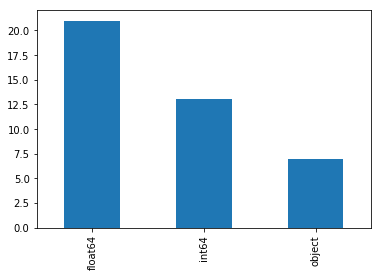

In [15]:
pp = pd.value_counts(df_pokemon.dtypes)
pp.plot.bar()
plt.show()

# Memory Consumption

Memory usage is an important aspect when dealing with hardware of limited capacity. 

In this section we will see 
* How we can monitor the memory usage using pandas
* Reduce the same by reassigning different datatypes

In [16]:
mem = df_pokemon.memory_usage(index=True).sum()
print("Memory consumed by training set  :   {} MB" .format(mem/ 1024**2))

Memory consumed by training set  :   0.25063323974609375 MB


By altering the datatypes we can reduce memory usage.

First we will reduce the possible integer datatypes

In [17]:
def change_datatype(df):
    float_cols = list(df.select_dtypes(include=['int']).columns)
    for col in float_cols:
        if ((np.max(df[col]) <= 127) and(np.min(df[col] >= -128))):
            df[col] = df[col].astype(np.int8)
        elif ((np.max(df[col]) <= 32767) and(np.min(df[col] >= -32768))):
            df[col] = df[col].astype(np.int16)
        elif ((np.max(df[col]) <= 2147483647) and(np.min(df[col] >= -2147483648))):
            df[col] = df[col].astype(np.int32)
        else:
            df[col] = df[col].astype(np.int64)

change_datatype(df_pokemon)

In [18]:
mem = df_pokemon.memory_usage(index=True).sum()
print("Memory consumed by training set  :   {} MB" .format(mem/ 1024**2))

Memory consumed by training set  :   0.19104957580566406 MB


We can see a reduction in memory used to store the dataframe.

Now let us reduce columns of type **float64** to type **float32**.

In [19]:
def change_datatype_float(df):
    float_cols = list(df.select_dtypes(include=['float']).columns)
    for col in float_cols:
        df[col] = df[col].astype(np.float32)
        
change_datatype_float(df_pokemon)

mem = df_pokemon.memory_usage(index=True).sum()
print("Memory consumed by training set  :   {} MB" .format(mem/ 1024**2))

Memory consumed by training set  :   0.12688255310058594 MB


We can see a further reduction in memory usage. So overall we have reduced the dataframe size by **~50%** from 0.25MB to 0.12MB.

# Data Exploration

Let us now explore the data present in different columns based on the various types.


In [20]:
object_cols = list(df_pokemon.select_dtypes(include=['object']).columns)

## Primary and Secondary types

Every pokemon is either a primary type (**type1**) or a combination of both primary and secondary type (**type2**). As a result some pokemon do not have a type2 variable, hence they are left to be with missing values. 

In [21]:
df_pokemon = df_pokemon.apply(lambda x: x.str.strip() if isinstance(x, str) else x).replace('HHH', np.nan)

In [22]:
df_pokemon['type1'].unique()

array(['grass', 'fire', 'water', 'bug', 'normal', 'poison', 'electric',
       'ground', 'fairy', 'fighting', 'psychic', 'rock', 'ghost', 'ice',
       'dragon', 'dark', 'steel', 'flying'], dtype=object)

In [23]:
df_pokemon['type2'].unique()

array(['poison', nan, 'flying', 'dark', 'electric', 'ice', 'ground',
       'fairy', 'grass', 'fighting', 'psychic', 'steel', 'fire', 'rock',
       'water', 'dragon', 'ghost', 'bug', 'normal'], dtype=object)

In [24]:
#--- Snippet to split pokemon based on whether they are of single type or dual type ---
single_type_pokemon = []
dual_type_pokemon = []

count = 0
for i in df_pokemon.index:
    if(pd.isnull(df_pokemon.type2[i]) == True):
    #if(df_pokemon.type2[i] == np.nan):
        count += 1
        single_type_pokemon.append(df_pokemon.name[i])
    else:
        dual_type_pokemon.append(df_pokemon.name[i])

print(len(dual_type_pokemon))
print(len(single_type_pokemon))

417
384


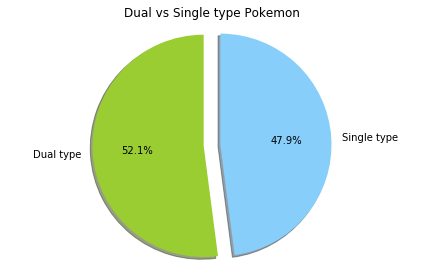

In [25]:
data = [417, 384]
colors = ['yellowgreen', 'lightskyblue']

# Create a pie chart
plt.pie(data, 
        labels= ['Dual type', 'Single type'], 
        shadow=True, 
        colors=colors, 
        explode=(0, 0.15), 
        startangle=90, 
        autopct='%1.1f%%')

# View the plot drop above
plt.axis('equal')
plt.title('Dual vs Single type Pokemon')
# View the plot
plt.tight_layout()
plt.show()

Primary pokemon type distribution:

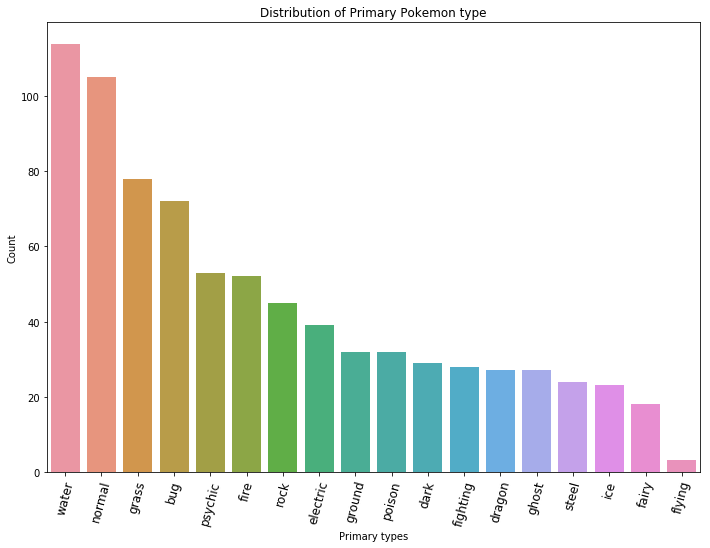

In [26]:
yy = pd.value_counts(df_pokemon['type1'])

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set_style("whitegrid")

ax = sns.barplot(x=yy.index, y=yy, data=df_pokemon)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 75, fontsize = 12)
ax.set(xlabel='Primary types', ylabel='Count')
ax.set_title('Distribution of Primary Pokemon type')

## Classfication

The Classification of the Pokemon as described by the Sun and Moon Pokedex. Apart from classifying Pokemon based n their natural type (rock, water, fire, etc.), they can also be classified by their physical traits which is shown here.

In [27]:
df_pokemon['classfication'].nunique()

588

There are over 500 types of Pokemon classified based on their physical traits. Let us just see the top 10 most occurring Pokemon types.

In [28]:
ss = pd.value_counts(df_pokemon['classfication'])
for i in range(0, 10):
    
    print ("{} : {} ".format(ss.index[i],  ss[i]))

Dragon Pokémon : 8 
Mouse Pokémon : 6 
Mushroom Pokémon : 6 
Fox Pokémon : 5 
Fairy Pokémon : 5 
Balloon Pokémon : 5 
Flame Pokémon : 5 
Poison Pin Pokémon : 4 
Drill Pokémon : 4 
Tadpole Pokémon : 4 


## percentage_male

This feature explains how masculine the pokemon is. Greater the percentage greater is its masulinity. Here are the list of various values:
* 100% - purely masculine.
* 0% - purely feminine.
* -1 - no gender.


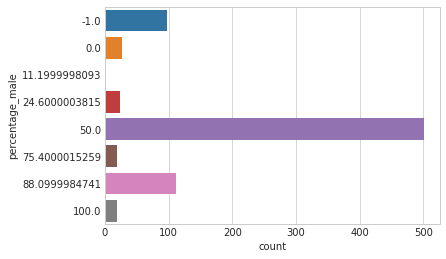

In [29]:
ax = sns.countplot(y=df_pokemon['percentage_male'], data=df_pokemon)  

Let us drill deeper into the following sub-divisions:

In [30]:
print ('Purely masculine pokemon : ', len(df_pokemon[df_pokemon.percentage_male == 100.0]))
print ('Purely feminine pokemon : ', len(df_pokemon[df_pokemon.percentage_male == 0.0]))
print ('Genderless pokemon : ', len(df_pokemon[df_pokemon.percentage_male == -1]))

print ('More masculine pokemon : ', len(df_pokemon[df_pokemon.percentage_male > 50.0]))
print ('More feminine pokemon : ', len(df_pokemon[(df_pokemon.percentage_male < 50.0) & (df_pokemon.percentage_male > -1.0)]))

print ('Mixture of feminine & masculine pokemon : ', len(df_pokemon[(df_pokemon.percentage_male < 100.0) & (df_pokemon.percentage_male > 0.0)]))

Purely masculine pokemon :  19
Purely feminine pokemon :  27
Genderless pokemon :  98
More masculine pokemon :  149
More feminine pokemon :  53
Mixture of feminine & masculine pokemon :  657


## Capture Rate

Describes the rate at which a Pokemon can be captured into a pokeball after a fight.

Let is see the list of possible values:

In [31]:
df_pokemon['capture_rate'].unique()

array(['45', '255', '120', '127', '90', '190', '75', '235', '150', '25',
       '170', '50', '200', '100', '180', '60', '225', '30', '35', '3',
       '65', '70', '125', '205', '155', '145', '130', '140', '15', '220',
       '160', '80', '55', '30 (Meteorite)255 (Core)'], dtype=object)

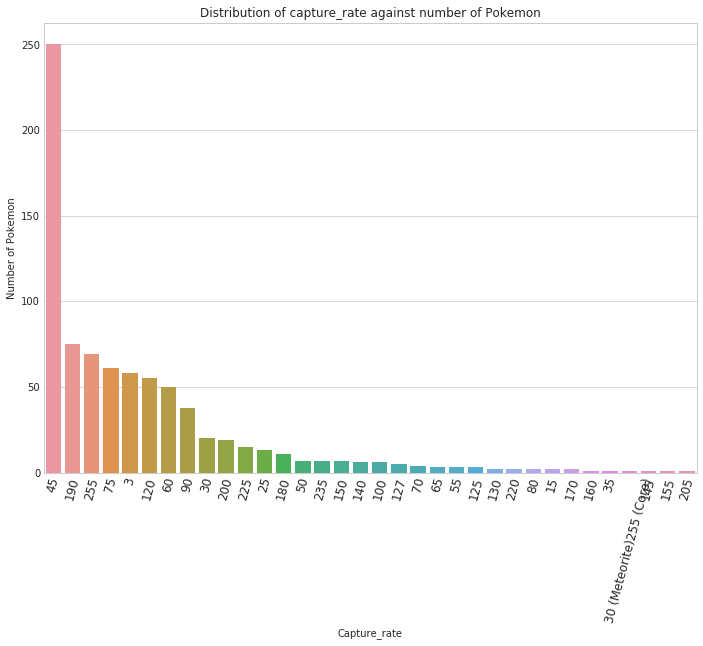

In [32]:
yy = pd.value_counts(df_pokemon['capture_rate'])

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set_style("whitegrid")

ax = sns.barplot(x=yy.index, y=yy, data=df_pokemon)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 75, fontsize = 12)
ax.set(xlabel='Capture_rate', ylabel='Number of Pokemon')
ax.set_title('Distribution of capture_rate against number of Pokemon')

## Abilities

Each Pokemon can have one or a list of possible powers.

Let is see the list of possible abilities:

In [33]:
df_pokemon['abilities'].nunique()

482

In [34]:
df_pokemon['abilities'].head(20).unique()

array(["['Overgrow', 'Chlorophyll']", "['Blaze', 'Solar Power']",
       "['Torrent', 'Rain Dish']", "['Shield Dust', 'Run Away']",
       "['Shed Skin']", "['Compoundeyes', 'Tinted Lens']",
       "['Swarm', 'Sniper']", "['Keen Eye', 'Tangled Feet', 'Big Pecks']",
       "['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hustle', 'Thick Fat']"], dtype=object)

As we can see many Pokemon have more than one ability. 

We need to drill down to see have of such individual abilities are present and which of them are the most prevalent.

In [147]:
list_ability = df_pokemon['abilities'].tolist()
len(list_ability)
new_list = []
for i in range(0, len(list_ability)):
    m = re.findall(r"'(.*?)'", list_ability[i], re.DOTALL)
    for j in range(0, len(m)):
        new_list.append(m[j])

list1 = set(new_list)
print(list1)
print(len(list1))



from collections import Counter
count  = pd.Series(df_pokemon['abilities'].str.replace('[\[\]\'\s]','').str.split(',').map(Counter).sum())

print(count.index)
ax = sns.countplot(count)

Index(['Adaptability', 'Aftermath', 'AirLock', 'Analytic', 'AngerPoint',
       'Anticipation', 'ArenaTrap', 'AromaVeil', 'AuraBreak', 'BadDreams',
       ...
       'WaterAbsorb', 'WaterBubble', 'WaterCompaction', 'WaterVeil',
       'WeakArmor', 'WhiteSmoke', 'WimpOut', 'WonderGuard', 'WonderSkin',
       'ZenMode'],
      dtype='object', length=227)


So we have 227 unique abilities for all 801 Pokemon!

So up to now we have seen all features of type object (string datatypes).

Now let us move over to the features of numeric  datatypes.

## Pokedex number

The entry number of the Pokemon in the National Pokedex. Here each Pokemon is assigned a number from 1 - 801.

In [36]:
df_pokemon['pokedex_number'].describe()

count    801.000000
mean     401.000000
std      231.373075
min        1.000000
25%      201.000000
50%      401.000000
75%      601.000000
max      801.000000
Name: pokedex_number, dtype: float64

## Height and Weight 

* **height_m**  : Height of the Pokemon in metres
* **weight_kg**: The Weight of the Pokemon in kilograms

Let us visualize the distribution of Pokemon along the range of height and weight:

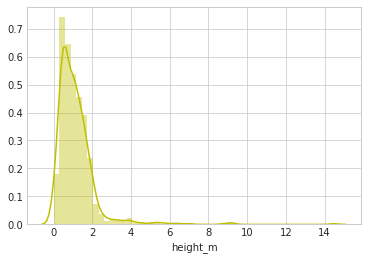

In [37]:
ax_height = sns.distplot(df_pokemon['height_m'], color="y")

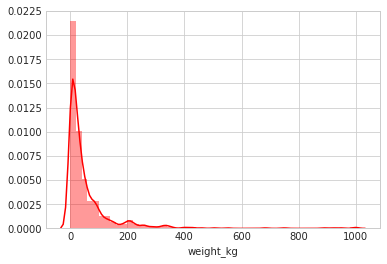

In [38]:
ax_weight = sns.distplot(df_pokemon['weight_kg'], color="r")

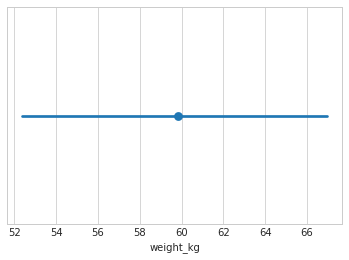

In [39]:
#--- Average weight ---
ax = sns.pointplot(df_pokemon['weight_kg'])

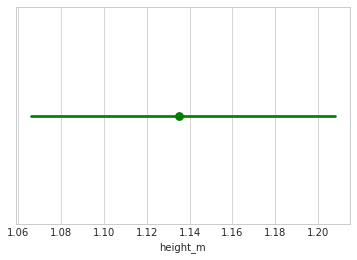

In [40]:
#---Average height ---
ax = sns.pointplot(df_pokemon['height_m'], color = 'g')

***Observations:***
* Average weight and height is ~59 kg and ~113 m respectively.
* Most Pokemon have a height of 0.1 - 4 m and weigh between 1 - 200 kg.

## base_egg_steps

The number of steps required to hatch an egg of the Pokemon.

In [41]:
df_pokemon['base_egg_steps'].nunique()

10

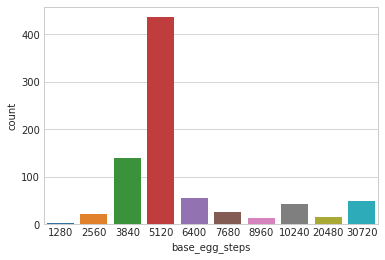

In [42]:
ax = sns.countplot(df_pokemon['base_egg_steps'])

***Observations:***
* There are only 10 unique steps for an egg to hatch
* Most of the Pokemon eggs take 5120 steps to hatch

## experience_growth

The Experience Growth of the Pokemon

In [43]:
df_pokemon['experience_growth'].nunique()

6

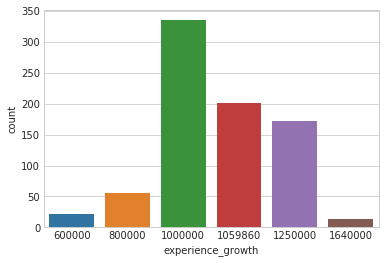

In [44]:
ax = sns.countplot(df_pokemon['experience_growth'])

***Observations:***
* There only 6 unique levels of experience
* Most Pokemon have experience in the range 1M - 1.25M

***What can be done?***
* We can see which primary type Pokemon has maximum experience growth.
* Understand  correlation between egg steps and experience.
To be done in Data Analysis section.

## base_happiness

Base Happiness of the Pokemon.

In [45]:
df_pokemon['base_happiness'].nunique()

6

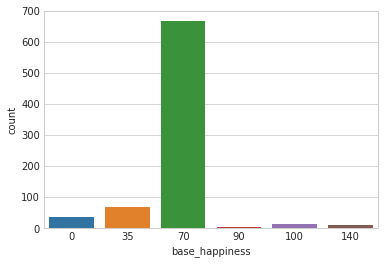

In [46]:
ax = sns.countplot(df_pokemon['base_happiness'])

*** Observations: ***
* There are 6 unique levels of happiness
* Most Pokemon have happiness index of 70
* Very few are extremely happy!! :)
* A handful of Pokemon are always grumpy :(

***What can be done?***
* We can see whether this decides their level of strength or not.

## hp

The Base HP of the Pokemon

In [47]:
df_pokemon['hp'].nunique()

99

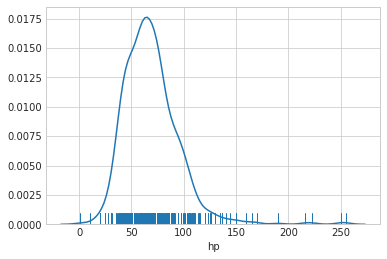

In [48]:
ax = sns.distplot(df_pokemon['hp'], rug=True, hist=False)

***Observations: ***
* Most Pokemon have base hp in the range 25 - 150.

***What can be done?***

We can see whether this decides their:
* level of strength, 
* depth in attack
* resistance to other attacks.

## attack and defense of Pokemon

The Base Attack and Defense of the Pokemon.

In [49]:
print(df_pokemon['attack'].nunique())
print(df_pokemon['defense'].nunique())

114
109


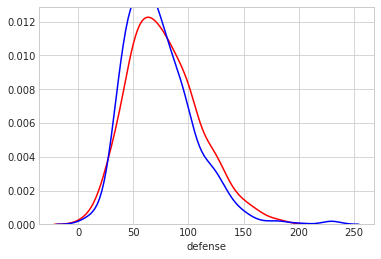

In [50]:
ax_attack = sns.distplot(df_pokemon['attack'], color="r", hist=False)
ax_defense = sns.distplot(df_pokemon['defense'], color="b", hist=False)

## sp_attack and sp_defense

The Base Special Attack and Base Special Defense of the Pokemon.

In [51]:
print(df_pokemon['sp_attack'].nunique())
print(df_pokemon['sp_defense'].nunique())

111
97


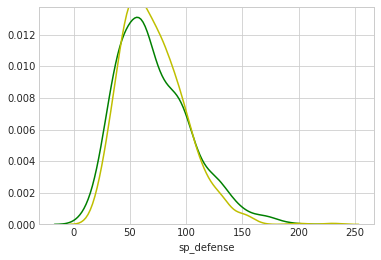

In [52]:
ax_attack = sns.distplot(df_pokemon['sp_attack'], color="g", hist=False)
ax_defense = sns.distplot(df_pokemon['sp_defense'], color="y", hist=False)

***Observations: ***
* Most Pokemon have base attack and defense and the related specials in the range 25 - 150.
* The end range of defense is more than that of attack.

***What can be done?***
* Correlation between attack and special_attack. Same goes for defense as well.
* Relation with base_hp.
* Club relation with primary/secondary type of Pokemon.

## against_

There are 18 features that denote the amount of damage taken against an attack of a particular type.

Let us get the list of columns having string **against_**

In [149]:
cols = df_pokemon.columns
against_ = []
for col in cols:
    if ('against_' in str(col)):
        against_.append(col)
        
print(len(against_)) 
print(against_)

18
['against_bug', 'against_dark', 'against_dragon', 'against_electric', 'against_fairy', 'against_fight', 'against_fire', 'against_flying', 'against_ghost', 'against_grass', 'against_ground', 'against_ice', 'against_normal', 'against_poison', 'against_psychic', 'against_rock', 'against_steel', 'against_water']


We have 18 as required and mentioned.

We would like to have a list of unique values across all these columns.

In [160]:
unique_elem = []
for col in against_:
    unique_elem.append(df_pokemon[col].unique().tolist())
    
result = set(x for l in unique_elem for x in l)

result = list(result)
print(result)


[0.5, 1.0, 2.0, 0.25, 4.0, 0.0]


We can see that it takes only within the above 6 values.

Now we can take the average of each of these columns and find the maximum to determine which attack majority of pokemon are susceptible to.

In [159]:
for col in against_:
    if (np.mean(df_pokemon[col]) > 1.2):
        print(col)

for col in against_:
    if (np.sum(df_pokemon[col]) > 1000):
        print(col)            

against_ice
against_rock
against_rock


We see most Pokemon are more susceptible to attacks from ice and rock Pokemon.

Let us see the distribution of these values in each of the columns:

against_bug
[ 1.    0.5   0.25  2.    4.  ]


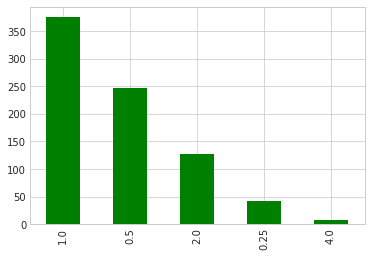

against_dark
[ 1.    0.5   2.    0.25  4.  ]


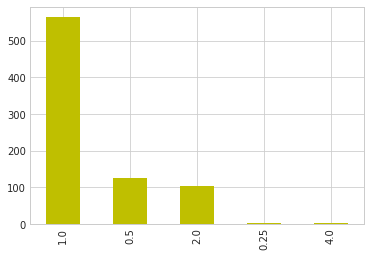

against_dragon
[ 1.   0.   0.5  2. ]


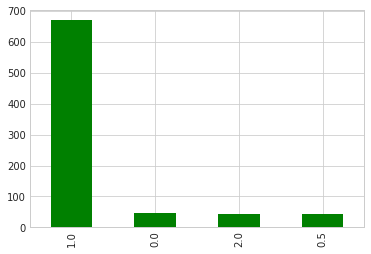

against_electric
[ 0.5   1.    2.    0.    4.    0.25]


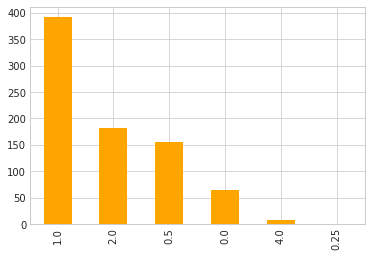

against_fairy
[ 0.5   1.    2.    0.25  4.  ]


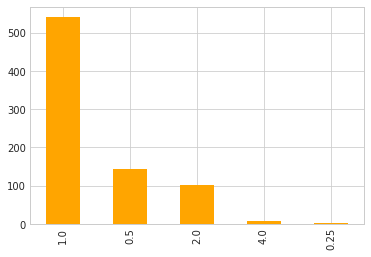

against_fight
[ 0.5   1.    0.25  2.    0.    4.  ]


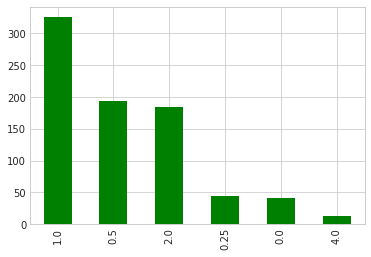

against_fire
[ 2.    0.5   1.    4.    0.25]


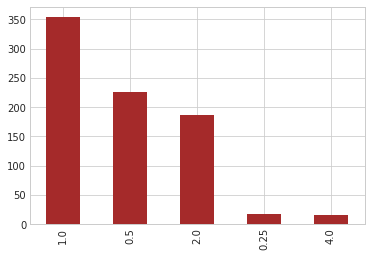

against_flying
[ 2.    1.    0.5   4.    0.25]


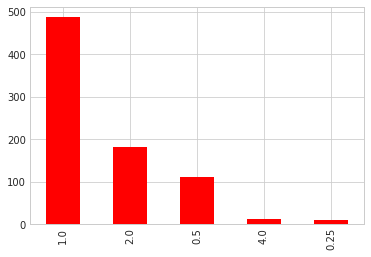

against_ghost
[ 1.   0.   2.   0.5  4. ]


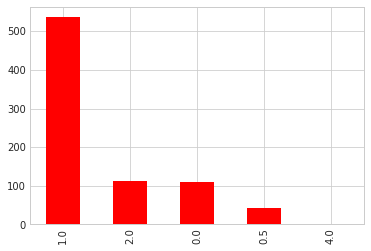

against_grass
[ 0.25  0.5   2.    1.    4.  ]


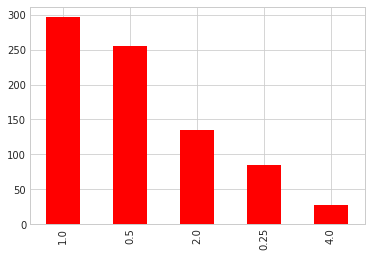

against_ground
[ 1.    2.    0.    0.5   0.25  4.  ]


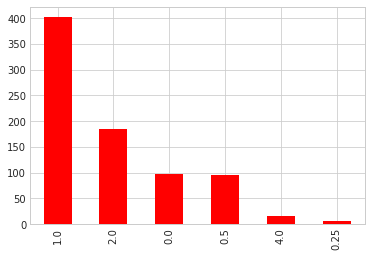

against_ice
[ 2.    0.5   1.    0.25  4.  ]


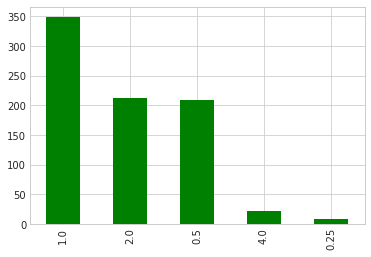

against_normal
[ 1.    0.5   0.    0.25]


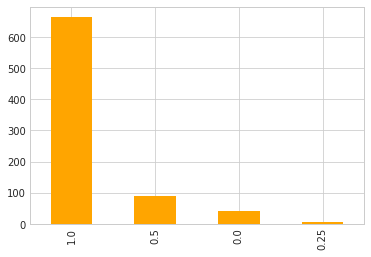

against_poison
[ 1.    0.5   0.25  2.    0.    4.  ]


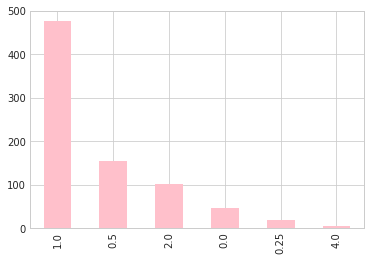

against_psychic
[ 2.    1.    0.5   0.    0.25  4.  ]


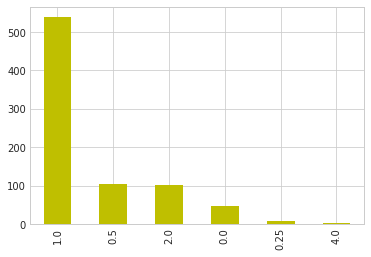

against_rock
[ 1.    2.    4.    0.5   0.25]


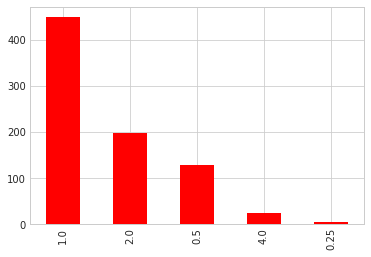

against_steel
[ 1.    0.5   2.    0.25  4.  ]


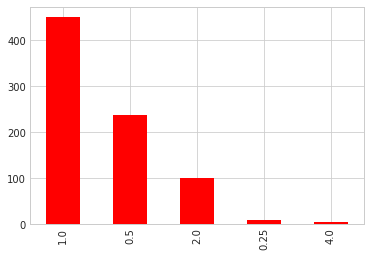

against_water
[ 0.5   2.    1.    4.    0.25]


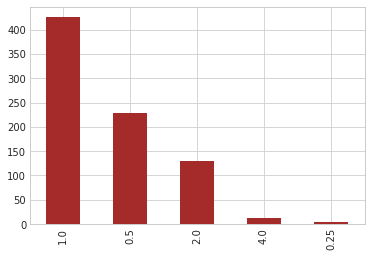

In [55]:
import random

for col in range(0, len(against_)):
    print (against_[col])
    print (df_pokemon[against_[col]].unique())
    pp = pd.value_counts(df_pokemon[against_[col]])
    
    color = ['g', 'b', 'r', 'y', 'pink', 'orange', 'brown']
            
    pp.plot.bar(color = random.choice(color))
    plt.show()

***Observations: ***
* Most pokemon suffer from every attack of atleast 1.0.
* There are some pokemon that can withstand certain attacks.

***What can be done?***
* We can relate which type of pokemon is more susceptible to attacks against certain types of pokemon.

## speed

The Base Speed of the Pokemon

In [56]:
print(df_pokemon['speed'].nunique())

113


In [57]:
df_pokemon['speed'].describe()

count    801.000000
mean      66.334582
std       28.907662
min        5.000000
25%       45.000000
50%       65.000000
75%       85.000000
max      180.000000
Name: speed, dtype: float64

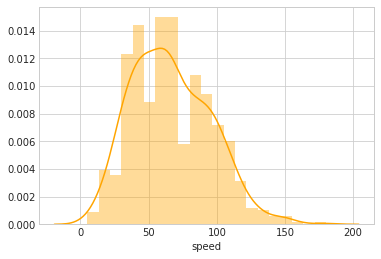

In [58]:
ax_height = sns.distplot(df_pokemon['speed'], color="orange")

Now what is the fastest and slowest Pokemon?

In [59]:
print('Fastest Pokemon: {}'.format(df_pokemon.name[df_pokemon['speed'].idxmax()] ))
print('Slowest Pokemon: {}'.format(df_pokemon.name[df_pokemon['speed'].idxmin()] ))

Fastest Pokemon: Deoxys
Slowest Pokemon: Shuckle


We can come up with our our definition of speed.

* Fast Pokemon > Mean + Standard_dev
* Slow Pokemon < Mean - Standard_dev
* Very Fast Pokemon > Mean + 2(Standard_dev)
* Very Slow Pokemon < Mean - 2(Standard_dev)

Let us see what we get:

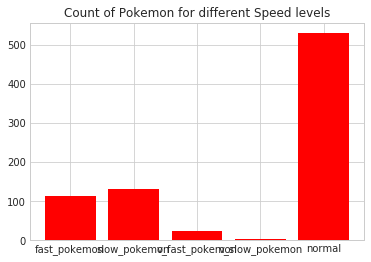

In [60]:
speed_statistics = df_pokemon['speed'].describe()

mean = speed_statistics[1]
standard_dev = speed_statistics[2]

#--- Create lists for the four categories mentioned ---
fast_pokemon = []
slow_pokemon = []
v_fast_pokemon = []
v_slow_pokemon = []
normal = []

for i in range(0, len(df_pokemon)):
    if(df_pokemon.speed[i] > mean + (2 * standard_dev)):
        v_fast_pokemon.append(df_pokemon.name[i])
    elif(df_pokemon.speed[i] < mean - (2 * standard_dev)):
        v_slow_pokemon.append(df_pokemon.name[i])
    elif(df_pokemon.speed[i] > mean + standard_dev):
        fast_pokemon.append(df_pokemon.name[i])
    elif(df_pokemon.speed[i] < mean - standard_dev):
        slow_pokemon.append(df_pokemon.name[i])
    else:
        normal.append(df_pokemon.name[i])
    
speed_levels = ['fast_pokemon','slow_pokemon','v_fast_pokemon','v_slow_pokemon','normal']
speed_count = [len(fast_pokemon), len(slow_pokemon), len(v_fast_pokemon),len(v_slow_pokemon),len(normal)]

xlocations = np.array(range(len(speed_count)))
width = 0
plt.bar(xlocations, speed_count, color = 'r')
plt.xticks(xlocations+ width, speed_levels)
#xlim(0, xlocations[-1]+width*2)
plt.title("Count of Pokemon for different Speed levels")

***Observations: ***
* Over 500 pokemon have speed within the mean and single standard deviation which is normal for our standards.
* A small portion has been labeled as fast and slow.
* An even smaller portion has been termed very fast and very slow.

***What can be done?***
* We can relate speed to strength of attack and the type of pokemon it is.
* We can add these features as well if modeling is done at a later time.

## generation

The numbered generation which the Pokemon was first introduced

In [61]:
print(df_pokemon['generation'].nunique())

7


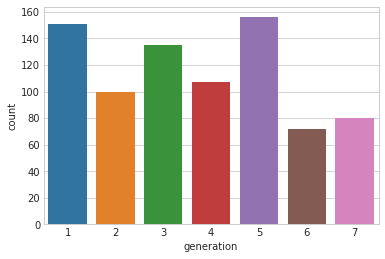

In [62]:
ax = sns.countplot(x="generation", data=df_pokemon)

Let us visualize it in terms of percentage:

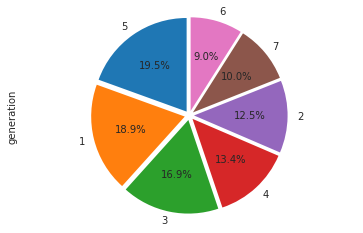

In [63]:
pp = pd.value_counts(df_pokemon.generation)
pp.plot.pie(startangle=90, autopct='%1.1f%%', shadow=False, explode=(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05))
plt.axis('equal')
plt.show()

***Observations: ***
* A bulk of the Pokemon are from 1st and 5th generations.

***What can be done?***
* We will see if later generation Pokemon have more hp, are legendary pokemon, or sufficient attck capability.

## is_legendary

Denotes if the Pokemon is legendary.

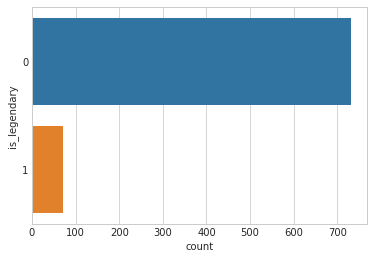

In [64]:
ax = sns.countplot(y=df_pokemon['is_legendary'], data=df_pokemon)

***Observations: ***
* Less than 100 Pokemon are deemed to be legendary.


***What can be done?***
* See whether legendary pokemon have exceptional egg steps, expereince, apart from attack, defense and base hp.
* What makes them so special to attain status of legend? We will see in the Data Analysis section.

# Data Analysis

Here we will see how each feature interacts with every other feature in order to gain more insights on whether they are likely to be dependent/correlated.

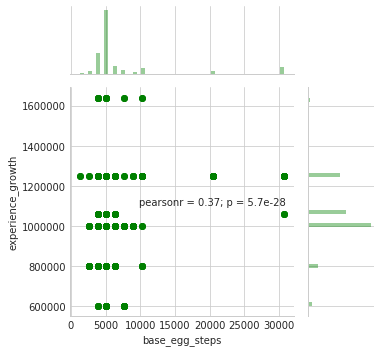

In [65]:
g = sns.jointplot("base_egg_steps", "experience_growth", data=df_pokemon, size=5, ratio=3, color="g")


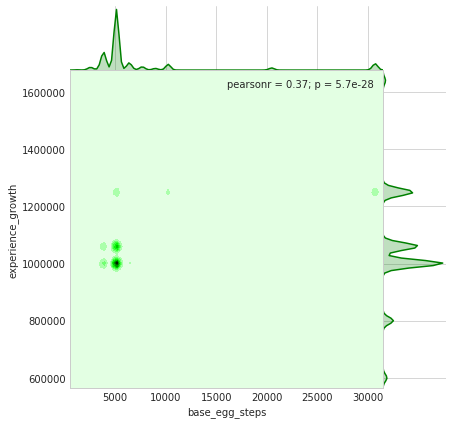

In [66]:
g = sns.jointplot("base_egg_steps", "experience_growth", data=df_pokemon, kind="kde", space=0, color="g")

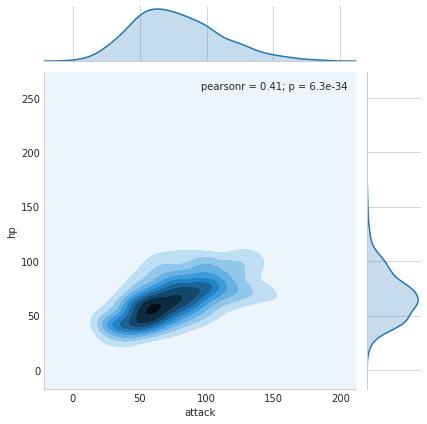

In [67]:
g = sns.jointplot("attack", "hp", data=df_pokemon, kind="kde")

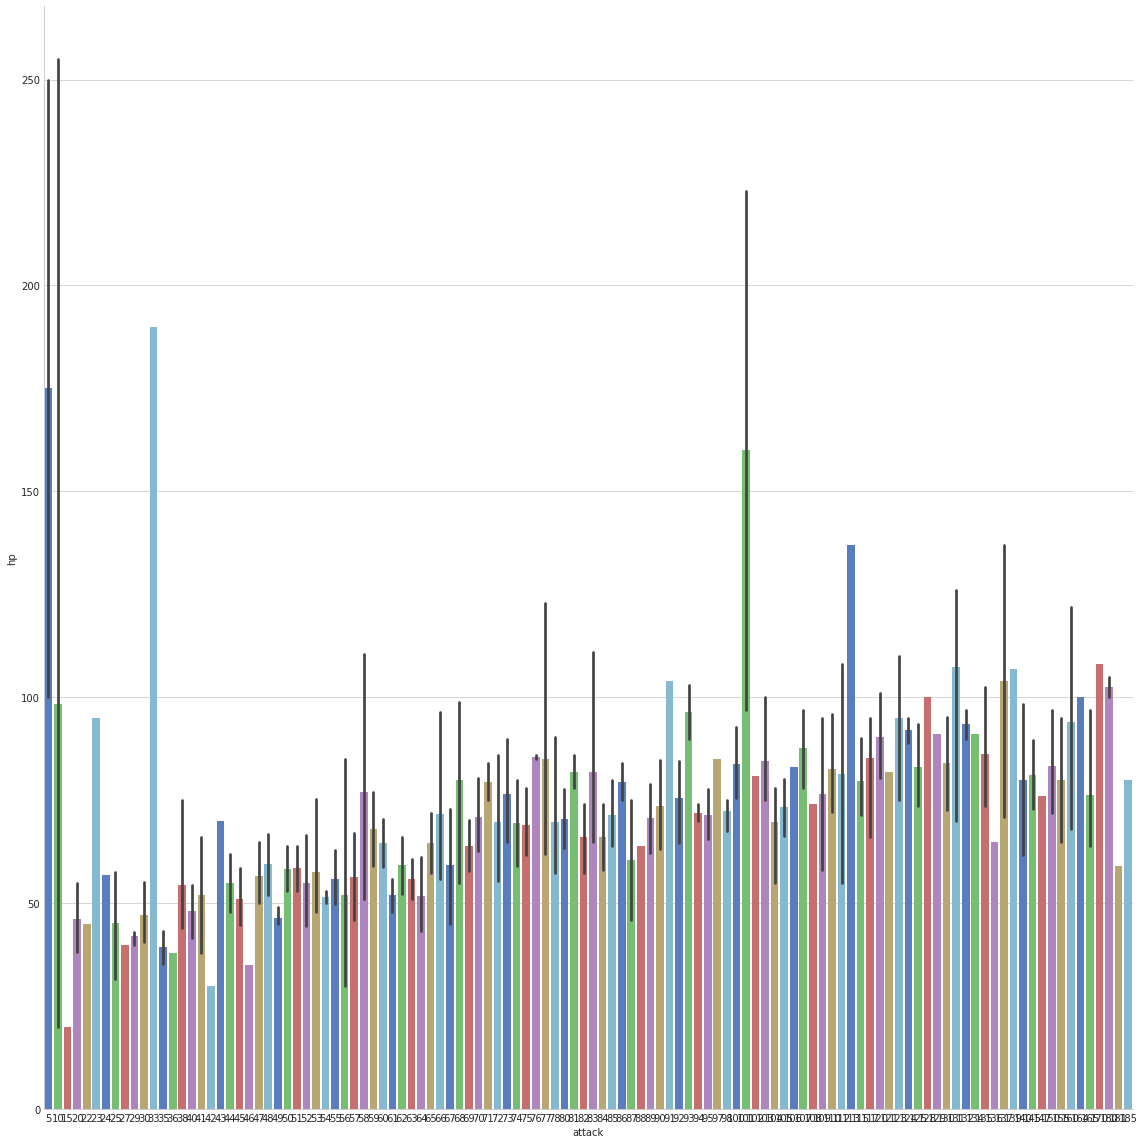

In [161]:
g = sns.factorplot(x="attack", y="hp", data=df_pokemon,
                   size=16, kind="bar", palette="muted")

# STAY TUNED FOR MORE !!!